# Deep Learning with Python

In this notebook, we will explore the basics of deep learning:
* **Multilayer Perceptrons**
    - Feedforward neural networks
    - Using Keras models with Scikit-Learn for general ML
* **Advanced Multilayer Perceptrons**
    - Further details on using Keras
    - Saving models (Network Serialization), Keep best models (Checkpointing)
    - Reduce overfitting with Dropout Regularization
    - Lift performance with Learning Rate Schedules
* **CNN**
    - CNN Basics
    - Improve model performance with Image Augmentation

In [1]:
# Install necessary deep learning libraries in our environment first

# conda install -c conda-forge tensorflow
# pip install keras

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Note: Keras only needs either Theano or Tensorflow
# Theano developed by University of Montreal, Tensorflow developed by Google

from platform import python_version

print(python_version())

# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

# check deep learning version numbers
# theano
import theano
print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

3.8.10
scipy: 1.6.2
numpy: 1.20.2
matplotlib: 3.3.4
pandas: 1.2.4
statsmodels: 0.12.0
sklearn: 0.23.2
theano: 1.0.4
tensorflow: 2.3.0
keras: 2.4.3


### TensorFlow

Computation is described in terms of data flow and operations in the structure of a directed graph.

**Simple Tensorflow example**

* Nodes: Nodes perform computation and have zero or more inputs and outputs. Data that moves between nodes are known as tensors, which are multi-dimensional arrays of real values.
* Edges: The graph defines the flow of data, branching, looping and updates to state. Special edges can be used to synchronize behavior within the graph, for example waiting for computation on a number of inputs to complete.
* Operation: An operation is a named abstract computation which can take input attributes and produce output attributes. For example, you could define an add or multiply operation.


In [8]:
# Simple Example of TensorFlow library
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# declare two symbolic floating-point scalars
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# create a simple symbolic expression using the add function
add = tf.add(a, b)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
sess = tf.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print(c)


4.0


### Keras
Keras is a minimalist Python library for deep learning that can run on top of Theano or TensorFlow. Developed and mainted by Google Engineer Francois Chollet using 4 guiding principles:

* Modularity: A model can be understood as a sequence or a graph alone. All the concerns of a deep learning model are discrete components that can be combined in arbitrary ways.
* Minimalism:The library provides just enough to achieve an outcome, no frills and maximizing readability.
* Extensibility: New components are intentionally easy to add and use within the framework, intended for developers to trial and explore new ideas.
* Python: No separate model files with custom file formats. Everything is native Python.

**Overview of construction of DL models in Keras:**
1. **Define your model.** Create a Sequential model and add configured layers.
2. **Compile your model.** Specify loss functions and optimizers and call the compile() function on the model.
3. **Fit your model.** Train the model on a sample of data by calling the fit() function on the model.
4. **Make predictions.** Use the model to generate predictions on new data by calling functions such as evaluate() or predict() on the model.

# Section 1: Multilayer Perceptrons
* Multilayer Perceptrons
* Neurons, Weights and Activations
* Networks of Neurons
* Training Networks

**Multilayer Perceptrons**
* Often called: Artificial Neural Networks, Neural Networks, Multilayer Perceptrons
* A Perceptron is a single neuron model that is a precursor to larger neural networks
* Power of NNs come from their ability to learn the representation in the training data and how to best relate it to the output variable that you want to predict.
* NNs learn a mapping.
* Predictive capability of NNs comes from the hierarchical or multilayered structure of the networks which can pick out (learn to represent) features at different scales or resolutions and combine them into higher-order features. eg. From lines, to collections of lines, to shapes.

**Neurons - Neurons**
* Building blocks for NNs
* Simple computational units that have weighted input signals and produce an output signal using an activation function

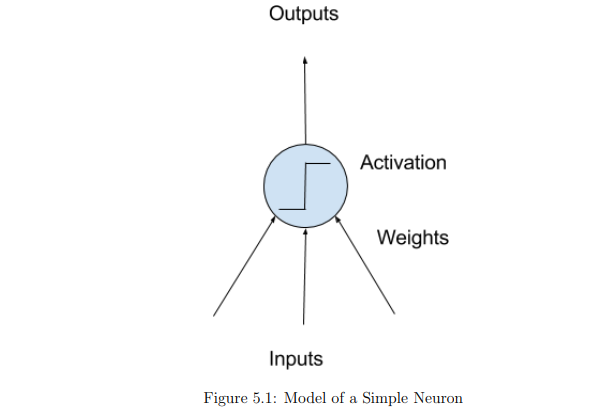

**Neuron - Weights**
* Weights are like coefficients used in a regression equation
* There is 1 weight for each input, and 1 for the bias on the Neuron itself. (eg. If 2 inputs, then 3 weights in total)
* Weights often initialized to small random values like 0 to 0.3
* Larger weights means increased complexity and fragility of the model
* Desirable to keep weights in network small, and we can do it through regularization techniques

**Neurons - Activation Function**
* Weighted inputs are summed and passed through an activation function (sometimes called transfer function)
* Activation function is simple mapping of summed weighted input to the output of the neuron
* 'Activation' because it governs the threshold at whichi the neuron is activated and the strength of the output signal
* Traditionally non-linear functions are used, allowing the network to combine inputs in more complex ways and in turn provide richer capability in the functions they can model
* Logistic Function (sigmoid function) - output value between 0 and 1 with s-shaped distribution
* Hyperbolic tangent function (Tanh) - output value between -1 to +1 with s-shaped distribution
* More recently, rectifier activation function has been shown to provide better results

**Networks of Neurons - Network**
* Neurons are arranged into networks
* A row of neurons is called a layer, and 1 network can have multiple layers
* Architecture of neurons in network is called network topology

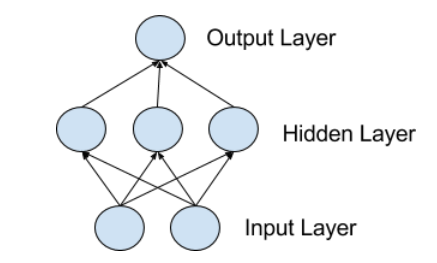

**Networks of Neurons - Input/ Visible layers**
* Bottom layer takes input, is called visible layer (it is exposed part of network)
* Often, a NN is drawn with the visible layer having 1 neuron per input value/ column in dataset
* These are not the neurons as described above, but they  just pass the input value through to the next layer

**Networks of Neurons - Hidden Layers**
* After input layer is hidden layers (not directly exposed to input)
* Simplest network structures is to have a single neuron in the hidden layer that directly outputs the value
* With advances, Deep Learning can refer to having many hidden layers in our NN
* 'Deep' because in the past it be VERY slow to train, but with technology advances, now it takes minutes/seconds

**Networks of Neurons - Output Layer**
* Final hidden layer is called output layer
* Responsible for outputting a value or vector of values that correspond to the format required for the problem
* Choice of activation function in output layer is strongly constrained by type of problem we are modelling:
    - Regression: Single output neuron, and neuron may have no activation function
    - Binary classification:Single output neuron, use sigmoid activation function to output value between 0 and 1 to represent probability of predicting a value for primary class. Can be further turned into crisp class values using thresholds (0.5 or etc)
    - Multiclass classification: May have multiple neurons in output layer, 1 for each class. Softmax activation function may be used to output probability of network predicting each of the class values. Output with highest probability can be chosen to produce a crisp class classification value.

**Training Networks - Data Preparation**
* Data must be numerical
* Categorical data needs to be one-hot encoded
* Output variable can also be one-hot encoded in classification problems with more than 1 class. This makes it easy to directly compare to the output of the neuron in the network's output layer (it outputs 1 value for each class).
* NNs require input to be scaled in consistent way
* Normalization - rescale to between 0 and 1
* Standardization - change distribution to mean 0 and SD 1
* Scaling also applies to image pixel data
* Words can be converted to integers such as frequency rank of word in dataset or other encoding techniques

**Training Networks - Stochastic Gradient Descent**
* Classical and still preferred training algorithm for NN
* 1 row of data exposed to network at a time as input
* **Forward Pass** - Network processes that 1 row of input through the hidden layer, to the output layer. This is also the type of pass that is used after network is trained, to make predictions on new data.
* **Back Propogation** - Output of network is compared to expected output and error is calculated. Error is propogated back through the network, 1 layer at a time, and weights are updated according to amount that they contributed to the error.
* **Epoch** - Process (Forward Pass + Back propogation) is repeated for all examples in training data. 1 round of this process of updating the network for entire training dataset is called an Epoch. Network may be trained for tens/hundreds/thousands of Epochs.

**Training Networks - Weight Updates**
* Online Learning
    - Weights updated from errors calculated *for each training example*
    - Fast, but chaotic changes to network
* Batch Learning
    - Errors saved up across all training examples, and network updated at the end (your batch size can vary)
    - More stable
* Size of batch (number of examplse network is shown before an update) is often reduced to small number such as tens or hundreds of examples for computational efficiencies.
* Learning Rate/ Step Size: Amount that weights are updated or changed for a given error. Often, small learning rates (0.1, 0.001 or smaller) are used.
* Momentum - incorporates properties from previous weight update allowing weights to continue to change in same direction even when less error is being calculated.
* Learning Rate Decay - used to decrease learning rate over Epochs to allow network to make large changes to weights at beginning, and smaller fine tuning changes later in the training schedule.

**Predictions**
* After NN is trained, we can make predictions on test or validation data to estimate the skill of the model
* The network topology and final set of weights is all that we need to save from the model
* Predictions are made by providing input to network and performing a forward-pass allowing it to generate an output that we use as a prediction

## Simple NN model with  Keras

Overview:
* Define model
    - Define sequence of layers (keep adding Sequential model)
    - Fully connected layers are defined using the Dense class. Specify number of neurons in layer, and activation function.
    - Here we use a fully-connected network with 3 layers
    - We use the rectifier (relu) activation function on 1st 2 layers and sigmoid activation function in output layer.
* Compile model
    - The backend (default is TensorFlow) will automatically choose the best way to represent the network for training and making predictions to run on our hardware.
    - We just need to specify some additional properties
    - Loss function we use logarithmic loss, for a binary classification problem is defined in Keras as 'binary_crossentropy'
    - We use the efficient gradient descent algorithm 'adam' (it is an efficient default)
* Fit model
    - We set a small number of epochs, and also a small number for batch_size for now.
    - These can be further chosen through experiments
* Evaluate model
    - We use the evaluation() function to generate predictions
    - For simplicity for now, we evaluate on some training records. Ideally we would split into train and test datasets. 

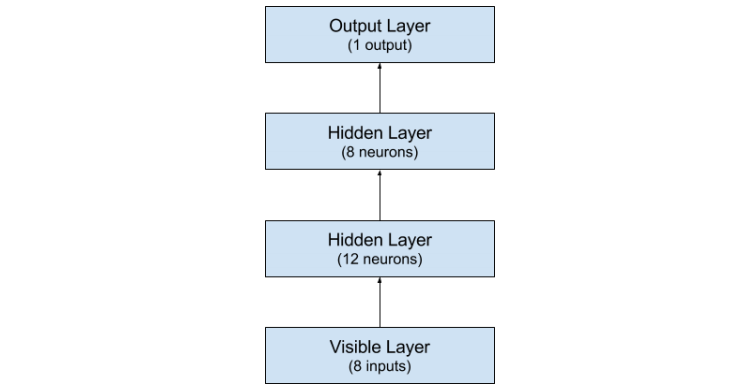

In [13]:
# load necessary libraries
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

# split into intput (X) and output (y) variables
X = dataset[: ,0:8]
y = dataset[:, 8]

# define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit keras model on dataset
model.fit(X, y, epochs=150, batch_size=16)

# evaluate keras model
_, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy*100:.2f}")

Train on 768 samples
Epoch 1/150
768/768 [==============================] - 0s 45us/sample - loss: 5.3827 - acc: 0.6510
Epoch 2/150
768/768 [==============================] - ETA: 0s - loss: 2.8922 - acc: 0.812 - 0s 45us/sample - loss: 5.3827 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 55us/sample - loss: 5.3827 - acc: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 48us/sample - loss: 5.3827 - acc: 0.6510
Epoch 5/150
768/768 [==============================] - 0s 50us/sample - loss: 5.3827 - acc: 0.6510
Epoch 6/150
768/768 [==============================] - 0s 49us/sample - loss: 5.3827 - acc: 0.6510
Epoch 7/150
768/768 [==============================] - 0s 50us/sample - loss: 5.3827 - acc: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 49us/sample - loss: 5.3827 - acc: 0.6510
Epoch 9/150
768/768 [==============================] - 0s 52us/sample - loss: 5.3827 - acc: 0.6510
Epoch 10/150
768/768 [============================

768/768 [==============================] - 0s 49us/sample - loss: 5.3827 - acc: 0.6510
Epoch 83/150
768/768 [==============================] - 0s 55us/sample - loss: 5.3827 - acc: 0.6510
Epoch 84/150
768/768 [==============================] - 0s 51us/sample - loss: 5.3827 - acc: 0.6510
Epoch 85/150
768/768 [==============================] - 0s 52us/sample - loss: 5.3827 - acc: 0.6510
Epoch 86/150
768/768 [==============================] - 0s 51us/sample - loss: 5.3827 - acc: 0.6510
Epoch 87/150
768/768 [==============================] - 0s 49us/sample - loss: 5.3827 - acc: 0.6510
Epoch 88/150
768/768 [==============================] - 0s 83us/sample - loss: 5.3827 - acc: 0.6510
Epoch 89/150
768/768 [==============================] - 0s 53us/sample - loss: 5.3827 - acc: 0.6510
Epoch 90/150
768/768 [==============================] - 0s 38us/sample - loss: 5.3827 - acc: 0.6510
Epoch 91/150
768/768 [==============================] - 0s 43us/sample - loss: 5.3827 - acc: 0.6510
Epoch 92/150


In [14]:
# We can make class predictions on data
predictions = model.predict_classes(X)

# Summarize the 1st 5 cases:
for i in range(5):
    print(f"{X[i].tolist()} => {predictions[i]} (expected {y[i]})")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => [0] (expected 1.0)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => [0] (expected 0.0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => [0] (expected 1.0)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => [0] (expected 0.0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => [0] (expected 1.0)


## Evaluate the performance of Deep Learning models
* Evaluate Keras model using automatic verification dataset
* Evaluate Keras model using manual verification dataset
* Evaluate Keras model using k-fold cross-validation

**Automatic Verification Dataset**
* Use validation_split() argument on the fit() function to a % of training dataset.
* Peformance of model is evaluated on that validation dataset for each epoch.

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 160us/sample - loss: 5.5070 - acc: 0.6401 - val_loss: 4.9482 - val_acc: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 95us/sample - loss: 3.9315 - acc: 0.6459 - val_loss: 2.6704 - val_acc: 0.6102
Epoch 3/150
514/514 [==============================] - 0s 91us/sample - loss: 1.6494 - acc: 0.6537 - val_loss: 0.8305 - val_acc: 0.6850
Epoch 4/150
514/514 [==============================] - 0s 93us/sample - loss: 0.7686 - acc: 0.6206 - val_loss: 0.7167 - val_acc: 0.6339
Epoch 5/150
514/514 [==============================] - 0s 93us/sample - loss: 0.6934 - acc: 0.6459 - val_loss: 0.7434 - val_acc: 0.5866
Epoch 6/150
514/514 [==============================] - 0s 91us/sample - loss: 0.7011 - acc: 0.6245 - val_loss: 0.7619 - val_acc: 0.5630
Epoch 7/150
514/514 [==============================] - 0s 93us/sample - loss: 0.6712 - acc: 0.6518 - val_loss: 0.7293 - val_acc: 0.6024
E

514/514 [==============================] - 0s 89us/sample - loss: 0.5613 - acc: 0.6946 - val_loss: 0.6307 - val_acc: 0.6654
Epoch 61/150
514/514 [==============================] - 0s 83us/sample - loss: 0.5713 - acc: 0.6848 - val_loss: 0.6468 - val_acc: 0.6496
Epoch 62/150
514/514 [==============================] - 0s 81us/sample - loss: 0.5588 - acc: 0.6946 - val_loss: 0.6643 - val_acc: 0.6575
Epoch 63/150
514/514 [==============================] - 0s 85us/sample - loss: 0.5619 - acc: 0.6965 - val_loss: 0.6456 - val_acc: 0.6614
Epoch 64/150
514/514 [==============================] - 0s 83us/sample - loss: 0.5682 - acc: 0.6984 - val_loss: 0.6469 - val_acc: 0.6457
Epoch 65/150
514/514 [==============================] - 0s 80us/sample - loss: 0.5699 - acc: 0.6848 - val_loss: 0.6425 - val_acc: 0.6654
Epoch 66/150
514/514 [==============================] - 0s 80us/sample - loss: 0.5624 - acc: 0.6926 - val_loss: 0.6377 - val_acc: 0.6614
Epoch 67/150
514/514 [==============================] 

514/514 [==============================] - 0s 87us/sample - loss: 0.5380 - acc: 0.7004 - val_loss: 0.6296 - val_acc: 0.6614
Epoch 120/150
514/514 [==============================] - 0s 85us/sample - loss: 0.5514 - acc: 0.6848 - val_loss: 0.6400 - val_acc: 0.6535
Epoch 121/150
514/514 [==============================] - 0s 80us/sample - loss: 0.5424 - acc: 0.7062 - val_loss: 0.6433 - val_acc: 0.6614
Epoch 122/150
514/514 [==============================] - 0s 89us/sample - loss: 0.5419 - acc: 0.6907 - val_loss: 0.6265 - val_acc: 0.6378
Epoch 123/150
514/514 [==============================] - 0s 83us/sample - loss: 0.5400 - acc: 0.6984 - val_loss: 0.6354 - val_acc: 0.6378
Epoch 124/150
514/514 [==============================] - 0s 80us/sample - loss: 0.5495 - acc: 0.6946 - val_loss: 0.6475 - val_acc: 0.6378
Epoch 125/150
514/514 [==============================] - 0s 179us/sample - loss: 0.5462 - acc: 0.7023 - val_loss: 0.6455 - val_acc: 0.6339
Epoch 126/150
514/514 [========================

**Manual Verification Dataset**
* Use train_test_split() function from scikit-learn library to separate into train and test dataset
* Specify validation dataset to fit() function in Keras by the validation_data argument

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 176us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 2/150
514/514 [==============================] - 0s 108us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 3/150
514/514 [==============================] - 0s 100us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 4/150
514/514 [==============================] - 0s 108us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 5/150
514/514 [==============================] - 0s 101us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 6/150
514/514 [==============================] - 0s 144us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 7/150
514/514 [==============================] - 0s 99us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_a

Epoch 60/150
514/514 [==============================] - 0s 91us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 61/150
514/514 [==============================] - 0s 83us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 62/150
514/514 [==============================] - 0s 89us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 63/150
514/514 [==============================] - 0s 122us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 64/150
514/514 [==============================] - 0s 93us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 65/150
514/514 [==============================] - 0s 87us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 66/150
514/514 [==============================] - 0s 109us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 67/150
514/514 [==========

Epoch 119/150
514/514 [==============================] - 0s 83us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 120/150
514/514 [==============================] - 0s 258us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 121/150
514/514 [==============================] - 0s 160us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 122/150
514/514 [==============================] - 0s 130us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 123/150
514/514 [==============================] - 0s 97us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 124/150
514/514 [==============================] - 0s 111us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 125/150
514/514 [==============================] - 0s 101us/sample - loss: 9.8145 - acc: 0.3599 - val_loss: 10.2592 - val_acc: 0.3268
Epoch 126/150
514/514 

**Manual k-fold cross validation**
* Cross-validation is often not used for evaluating deep learning models because of greater computational expense.
* eg. Typically we use 5 or 10 folds for k-fold.
* However if problem is small enough or if we have sufficient compute resources, k-fold cross-validation can give a less biased estimate of the performance of the model.
* We use StratifiedKFold class from scikit-learn library
* We use verbose=0 to turn off the verbose output for each epoch. This way we only print the performance.

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

acc: 74.03%
acc: 71.43%
acc: 74.03%
acc: 72.73%
acc: 64.94%
acc: 64.94%
acc: 63.64%
acc: 76.62%
acc: 71.05%
acc: 65.79%
69.92% (+/- 4.43%)


## Use Keras Models with Scikit-Learn for General ML
* Wrap a Keras model for use with scikit-learn ML library
* Easily evaluate Keras models using cross-validation in scikit-learn
* Tune Keras model hyperparameters using grid search in scikit-learn

**Evaluate models using Cross-Validation**
* KerasClassifier and KerasRegressor classes in Keras take an argument 'build_fn' which is the name of the function to call to create our model.
* We define our own function that: defines the model, compiles it, and returns it.
* We use StratifiedKFold to perform 10-fold stratified cross-validation (as per normal ML)
* We use cross_val_score() to evaluate our model using cross-validation scheme

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7266233801841736


**Grid Search Deep Learning model parameters**
* The build_fn argument in the KerasClassifier wrapper can also take arguments
* We use our custom create_model() function to take 2 arguments: optimizer and init, both of which must have default values
* We define arrays of values for the parameters we wish to search:
    - **Optimizers** for searching different weight values
    - **Initializers** for preparing the network weights using different schemes
    - **Number of Epochs** for training the model for diff number of exposures to the training dataset
    - **Batches** for varying the number of samples before weight updates
* Options are specified into a dictionary and passed to the configuration of the GridSearchCV scikit-learn class
* We will have a (2x3x3x3) combination of optimizers, initializations, epochs and batches.
* Each combination is then evaluated using the default of 3-fold stratified cross-validation.
* There are many models to be tested and is computation-intensive.
* It may be useful for us to design experiments with small subsets of data.

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Best: 0.746094 using {'batch_size': 5, 'epochs': 150, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.634115 (0.027126) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.700521 (0.014731) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.720052 (0.022402) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.700521 (0.017566) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.691406 (0.019401) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.709635 (0.011201) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.692708 (0.023073) with: {'batch_size': 5, 'epochs': 100,

### Project: Multiclass Classification of Flower Species
* Load data from CSV and make it available to Keras
* Prepare multiclass classification data for modelling with NNs
* Evaluate Keras NN models with scikit-learn

In [22]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# load dataset
dataframe = read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

# We 1st encode the strings consistently to integers using LabelEncoder, then convert the vector of integers to
# a ont-hot-encoding using the Keras function to_categorical()
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# define baseline model
# A fully connected netwprl with 1 hidden layer (containing 8 neurons)
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 96.67% (4.47%)


### Project: Binary Classification of Sonar Returns
* Load training data and make it available to Keras
* Design and train NN for tabular data
* Evaluate performance of NN on unseen data
* Perform data prep to improve skill when using NN
* Tune topology and configuration of NN in Keras

**We 1st create a baseline model without data preprocessing and further tuning**

In [24]:
# Load necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 82.19% (8.05%)


**We perform Data Preprocessing**

In [25]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100,
                                          batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 87.05% (5.64%)


**We try evaluating a Smaller Network**
* If we suspect that there is some redundancy in the input variables, we can force a type of feature extraction by the network by restricting the representation space int he 1st hidden layer
* We can halve the number of neurons from 60 to 30 in the 1st hidden layer.
* This will put pressure on the network during training to pick out the most important structure in the input data to model.

In [26]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# smaller model
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100,
                                          batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 86.43% (7.95%)


**We try to evaluate a Larger Network**
* We try to modify the NN topology by adding more layers
* This can offer more opportunity for the network to extract key features and recombine them in useful nonlinear ways.
* Here, we add 1 new hidden layer to the network after the 1st hidden layer.

In [27]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5,
verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 87.95% (10.33%)


### Project: Regression of Boston House Prices
* Load CSV dataset and make it available to Keras
* Create NN model with Keras for Regression problem
* Use scikit-learn with Keras to evaluate models using cross-validation
* Perform data preparation to improve skill with Keras models
* Tune network topology with Keras

The Boston Housing dataset has 13 input variables and 1 target. Here, the baseline model would be:
* 1 hidden layer with input_dim=13

However, we explore making the network deeper by adding another hidden layer with approx half the number of neurons:
* model.add(Dense(6, activation='relu'))

In addition, this being a Regression problem, in the output layer, we do not need to specify an activation function. We are interested in predicting numerical values directly without transform.

In [29]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5,
verbose=0)))

pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)

results = cross_val_score(pipeline, X, Y, cv=kfold)

print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -21.94 (27.32) MSE


# Section 2: Advanced Multilayer Perceptrons
* Further details on using Keras
* Saving models (Network Serialization), Keep best models (Checkpointing)
* Reduce overfitting with Dropout Regularization
* Lift performance with Learning Rate Schedules

**Save Model Weights and Architecture Together**
* Overview
    - model.save("model.h5")
    - model = load_model("model.h5")
    - model.summary()
* Keras supports a simple interface to save both model weights and model architecture together into a single H5 file:
    - Model weights
    - Model architecture
    - Model compilation details (loss and metrics)
    - Model optimizer state
* This is as compared to other methods such as:
    - Saving model structure into JSON format + model weights into H5 format
    - Saving model structure into YAML format + model weights into H5 format
    - For these 2 ways, not only are there more steps involved, after we load the model + weights in, we still have to re-compile again before running predictions

In [30]:
# Saving the Keras model

# Import necessary libraries
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

acc: 78.26%
Saved model to disk


In [31]:
# Loading the Keras model

# Import necessary libraries
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()

# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_707 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_708 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_709 (Dense)            (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 78.26%


**Keep the best models during training with Checkpointing**
* Importance of checkpointing neural network models when training
* How to checkpoint each improvement to a model during training
* How to checkpoint the very best model observed during training

**Access model training history in Keras**
* Keras registers callbacks when training a DL model
* 1 of the default callbacks that is registered when training all DL models is the History callback.
* It records training metrics for each Epoch:
    - loss and accuracy for training dataset (for classification problems)
    - loss and accuracy for validation dataset (if 1 is set)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


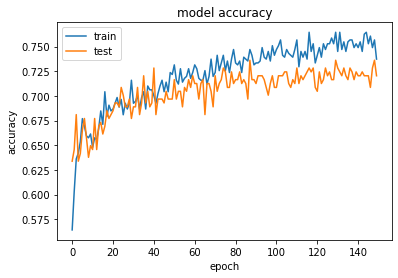

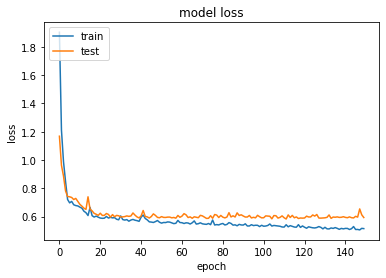

In [34]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Note:**
* We can see that the trend for accuracy on both train and test (validation) is still rising for the last few epochs. It may be possible to train the model a little more. The model has not yet over-learned the training dataset.
* From the loss plot, we can see comparable performance on both train and validation datasets. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier Epoch.

**Reduce Overfitting with Dropout Regularization**
* How dropout Regularization works
* How to use dropout on input layers
* How to use dropout on hidden layers

**Dropout:**
* Randomly selected neurons are ignored during training. (they are 'dropped-out' randomly)
* Their contribution to activation of downstream neurons is temporarily removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.
* As a NN learns, neuron weights settle into their context within the network.
* Weights of neurons are tuned for specific features providing some specialization.
* Neighboring neurons come to rely on this specialization, which if taken too far can result in a fragile model too specialized to the training data.
* This reliance on context for a neuron during training is called complex co-adaptations.
* So if neurons are randomly dropped out of the network during training, other neurons will have to step in to handle the representation required to make predictions for the missing neurons.
* This is believed to result in multiple independent internal representations being learned by the network.
* The net effect is that network becomes less sensitive to specific weights of neurons. Hence resulting in network that is capable of better generalization and is less likely to overfit the training data.

In [35]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline fully connected model with 2 hidden input layers, and using Stochastic Gradient Descent to train the model with
# a relatively low learning rate and momentum.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=300,
batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=10, shuffle=True)

results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 83.19% (7.13%)


**Using dropout on the visible layer**
* Dropout can be applied to input neurons (visible layer).
* Here, a new dropout layer is added between the input and the 1st hidden layer.
* The dropout rate is set to 20%, which means that 1 in 5 inputs will be randomly excluded from each update cycle.
* Additionally, it is also recommended to impose a constraint on the weights for each hidden layer, ensuring that the maximum norm of the weights does not exceed a value of 3.
* We do this by setting the kernel_constraint argument on the Dense class when constructing the layers.
* Learning rate was lifted by 1 order of magnitude, and momentum was increased to 0.9.

In [36]:
# This time using dropout on the visible (input) layer

# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16,
verbose=0)))

pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 87.07% (8.81%)


**Using dropout on hidden layers**
* Dropout can also be applied to hidden layers in the body of the network model.
* Here, we add dropout between the 2 hidden layers, and again between the last hidden layer and the output layer.

In [37]:
# Import neccessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16,
verbose=0)))

pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Hidden: 84.21% (8.78%)


**Note:**
* We can see from the above 2 examples that using Dropout with the current set of configured parameters resulted in lower performance. It is possible that additional training epochs are required, or that further tuning is required to the learning rate.

**Tips/ Heuristics for using Dropout:**
* Generally use a small dropout value of 20%-50% of neurons with 20% providing a good starting point to try. Too low a probability has minimal effect, while a value too high results in under-learning by the network.
* Use a larger network. More likely to get better performance when dropout is used on larger network, giving the model more of an opportunity to learn independent representations.
* Use dropout on input (visible) as well as hidden layers. Application of dropout at each layer of the network has shown good results.
* Use a large learning rate with decay and a large momentum. Increase learning rate by factor of 10 to 100, and use a high momentum value of 0.9 or 0.99.
* Constrain the size of network weights. Large learning rate can result in very large network weights. Imposing a constraint on the size of network weights such as max-norm regularization with a size of 4 or 5 has been shown to improve results.

**Lift Performance with Learning Rate Schedules**
* Benefit of learning rate schedules on lifting model performance during training
* How to configure and evaluate a time-based learning rate schedule
* How to configure and evaluate a drop-based learning rate schedule

* Adapting learning rate for stochastic gradient descent (SGD) optimization procedure can increase performance and reduce training time.
* This is called Learning Rate Anneling, or Adaptive Learning Rates. We will just call it *Learning Rate Schedule*.
* The default scheudle is to use a constant learning rate to update network weights for each training epoch.
* Simplest and most used adaptation of learning rates is to **reduce the learning rate over time**. Benefits:
    - Make large changes at beginning of training when larger learning rate values are used
    - Decreasing learning rate such that smaller rate and therefore smaller training updates are made to weights later in the training.
    - Has the effect of quickly learning good weights early, and fine tuning them later.
* 2 popular and easy to use learning rate schedules are:
    - **Decrease learning rate gradually based on the Epoch**
    - **Decrease learning rate using punctuated large drops at specific Epochs.**

**Time-Based learning rate schedule in Keras**
* Keras has a time-based learning rate schedule built in.
* The SGD optimization algorithm implementation in the SGD class has an argument called decay. It is used in the time-based learning rate decay schedule equation as follows:
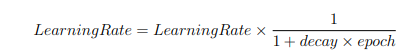
* When the decay argument is specified, it will decrease learning rate from previous epoch by the given fixed amount.
* We can create a nice default schedule by setting the decay value as follows:
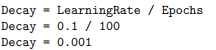

In [38]:
# Import necessary libraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# load dataset
dataframe = read_csv("ionosphere.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
235/235 - 3s - loss: 0.5972 - acc: 0.6809 - val_loss: 0.4282 - val_acc: 0.8793
Epoch 2/50
235/235 - 0s - loss: 0.4287 - acc: 0.8255 - val_loss: 0.3975 - val_acc: 0.9310
Epoch 3/50
235/235 - 0s - loss: 0.3137 - acc: 0.9021 - val_loss: 0.2648 - val_acc: 0.9569
Epoch 4/50
235/235 - 0s - loss: 0.2583 - acc: 0.9064 - val_loss: 0.3126 - val_acc: 0.9224
Epoch 5/50
235/235 - 0s - loss: 0.2211 - acc: 0.9362 - val_loss: 0.1548 - val_acc: 0.9828
Epoch 6/50
235/235 - 0s - loss: 0.1874 - acc: 0.9362 - val_loss: 0.1404 - val_acc: 0.9828
Epoch 7/50
235/235 - 0s - loss: 0.1624 - acc: 0.9489 - val_loss: 0.1243 - val_acc: 0.9828
Epoch 8/50
235/235 - 0s - loss: 0.1488 - acc: 0.9574 - val_loss: 0.1274 - val_acc: 0.9828
Epoch 9/50
235/235 - 0s - loss: 0.1383 - acc: 0.9532 - val_loss: 0.1054 - val_acc: 0.9828
Epoch 10/50
235/235 - 0s - loss: 0.1288 - acc: 0.9617 - val_loss: 0.0887 - val_acc: 0.9914
Epoch 11/50
235/235 - 0s - loss: 0.1248 - acc: 0.9660

**Drop-based learning rate schedule**
* Systematically drop learning rate at specific times/epochs during training
* Often implemented by **dropping learning rate by half every fixed number of Epochs**.
* Implemented in Keras using the *LearningRateScheduler* callback when fitting the model.
* The callback allows users to define a function to call that takes the epoch number as an argument and returns the learning rate to use in SGD.
* When this is used, the default learning rate specified by SGD is ignored.
* Here, we create a new, custom step_decay() function to implement the learning rate equation:
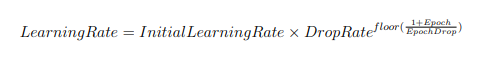
* InitialLearningRate is learning rate at beginning of run, EpochDrop is how often learning rate is dropped in Epochs, and DropRate is how much to drop the learning each time it is dropped.

In [39]:
# Import necessary libraries
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# load dataset
dataframe = read_csv("ionosphere.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
sgd = SGD(lr=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list,
verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
235/235 - 3s - loss: 0.6396 - acc: 0.6468 - val_loss: 0.4714 - val_acc: 0.8621
Epoch 2/50
235/235 - 0s - loss: 0.4242 - acc: 0.8851 - val_loss: 0.3125 - val_acc: 0.9483
Epoch 3/50
235/235 - 0s - loss: 0.2712 - acc: 0.9064 - val_loss: 0.1480 - val_acc: 0.9741
Epoch 4/50
235/235 - 0s - loss: 0.2436 - acc: 0.8894 - val_loss: 0.1483 - val_acc: 0.9569
Epoch 5/50
235/235 - 0s - loss: 0.2475 - acc: 0.9106 - val_loss: 0.5366 - val_acc: 0.6897
Epoch 6/50
235/235 - 0s - loss: 0.2575 - acc: 0.8681 - val_loss: 0.1240 - val_acc: 0.9655
Epoch 7/50
235/235 - 0s - loss: 0.1879 - acc: 0.9319 - val_loss: 0.1161 - val_acc: 0.9741
Epoch 8/50
235/235 - 0s - loss: 0.1317 - acc: 0.9617 - val_loss: 0.1831 - val_acc: 0.9741
Epoch 9/50
235/235 - 0s - loss: 0.1199 - acc: 0.9574 - val_loss: 0.0713 - val_acc: 0.9741
Epoch 10/50
235/235 - 0s - loss: 0.1253 - acc: 0.9574 - val_loss: 0.1181 - val_acc: 0.9741
Epoch 11/50
235/235 - 0s - loss: 0.0976 - acc: 0.9787

**Tips for using Learning Rate Schedules**
* **Increase the initial learning rate**. Because learning rate will decrease, start with larger value to decrease from. Larger learning rate will result in much larger changes to the weights, at least at the beginning, allowing users to benefit from fine tuning later.
* **Use a large momentum**. Using a larger momentum helps the optimization algorithm to continue to make updates in right direction when learning rate shrinks to small values in later epochs.
* **Experiment with different schedules**. It will not be immediately clear which learning rate schedule to use, so have to try a few diff configuration options and see what works best on the problem. Can also try schedules that change exponentially, and even schedules that respond to accuracy of model on training or test datasets.

# Section 3: Convolutional Neural Networks
* Introduction to CNN:
    - Building blocks used in CNNs such as convolutional layers and pool layers
    - Short worked example
    - Best practices for configuring CNNs on object recognition tasks
* Project Handwritten Digit Recognition
* Improve Model Performance with Image Augmentation
* Project: Object Recognition in Photographs
* Project: Predict Sentiment from Movie Reviews

**Introduction to CNN**
* CNNs are a powerful artificial neural network technique which preserves the spatial structure of the problem and were developed for object recognition tasks.
* Also called ConvNets

* CNNs preserve the spatial r/s between pixels by learning internal feature representations using small squares of input data.
* Features are learned and used across the whole image, allowing the objects in images to be shifted or translated in the scene and still be detectable by the network.
* This makes it very useful for object recognition in picking out features in pictures with varying orientation.
* Key pointers:
    - CNNs use fewer parameters (weights) to learn than a fully connected network (MLP)
    - Designed to be invariant to object position and distortion in the scene
    - Automatically learn and generalize features from input domain

**Building Blocks of CNN**

3 types of layers in CNN **(C.P.F)**:
* Convolutional Layers
    - Filters
    - Feature Maps
* Pooling Layers
* Fully-Connected Layers

**Convolutional Layers:**

Comprised of **filters** and **feature maps**
* Filters:
    - Basically the neurons of the layer. They have both weighted inputs and generate output value like a neuron.
    - Input size is a fixed square called a **patch** or a receptive field
    - If the conv layer in an input layer, then the input patch will be pixel values
    - If the conv layer is deeper in the network architecture, then the conv layer will take input from a *feature map* from the previous layer.
* Feature Maps:
    - The output of 1 filter applied to the previous layer
    - Filter is drawn across entire previous layer and moved 1 pixel at a time
    - Each position results in an activation of the neuron, and the output is collected in the feature map
    - Distance that filter is moved across input from previous layer for each activation is referred to as the *stride*

**Pooling Layers:**
* Downsamples the previous layers feature map
* Follows a sequence of 1 or more convolutional layers, are intended to consolidate the features learned and expressed in previous layer's feature map
* Pooling can be considered a technique to compress or generalize feature representations and generally reduce the overfitting of the training data by the model
* Pooling layers also have a receptive field, often much smaller than the conv layer
* Size of stride or number of inputs that the receptive field (patch) is moved for each activation is often equal to the size of the receptive field to avoid any overlap
* Pooling layers are often very simple, taking the average or the maximum of the input value in order to create its own feature map

**Fully Connected Layers:**
* The normal flat feedforward NN layer
* These layers may have a nonlinear activation function, or a softmax activation in order to output probabilities of class predictions
* Used at end of network after feature extraction and consolidation has been performed by the Convolutional and Pooling layers
* Used to create final nonlinear combinations of features and for making predictions by the network

**Simple Illustrative Worked Example of the above:**
* Image input data
    - Grayscale immages (1 channel only)
    - Size of 32 pixels wide, 32 pixels high, each pixel value between 0 and 255
    - So, 32x32x1 = 1,024 pixel values
* Convolutional Layer
    - We define a Conv layer with 10 filters and a receptive field (patch) of 5 pixels wide and 5 pixels high, and stride length of 1
    - Each filter only gets input from 5x5 = 25 pixels at a time, so each filter will require 25+1 input weights (+1 for the bias input itself)
    - Dragging the 5x5 receptive field across the input image data with stride width of 1 results in a feature map of 28x28 output values, ie. 784 distinct activations per image
    - With 10 filters, that is 10 different 28x28 feature maps, or 7,840 outputs created for 1 image
    - All together: (26 inputs per filter) x (10 filters) x (28x28 output values to calculate per filter) = 203,840 connections in our conv layer.
    - Conv layers also make use of nonlinear transfer function as part of activation, with RELU (rectifier activation function being the popular default to use)
* Pool Layer
    - We define a pooling layer with a receptive field with a width of 2 inputs and a height of 2 inputs
    - We use a stride of 2 to ensure there is no overlap
    - This results in feature maps that are one half the size of the input feature maps
    - Meaning from 10 diff 28x28 feature maps as input to 10 diff 14x14 feature maps as output
    - We use a max() operation for each receptive field so that the activation is the max input value
* Fully Connected Layer
    - Finally, we flatten out the square feature maps into a traditional flat fully connected layer
    - We define the fully connected layer with 200 hidden neurons, each with 10x14x14 input connections, or 1,960+1 weights per neuron, for a total of 392,200 connections and weights to learn in this layer
    - We use a sigmoid or softmax transfer function to output probabilities of class values directly

**Convolutional NN Best Practices:**
* **Input Receptive Field Dimensions:** The default is 2D for images, but could be 1D such as for words in a sentence or 3D for video that adds a time dimension.
* **Receptive Field Size:** The patch should be as small as possible, but large enough to see features in the input data. It is common to use 3 × 3 on small images and 5 × 5 or 7 × 7 and more on larger image sizes.
* **Stride Width:** Use the default stride of 1. It is easy to understand and you don’t need padding to handle the receptive field falling off the edge of your images. This could be increased to 2 or larger for larger images.
* **Number of Filters:** Filters are the feature detectors. Generally fewer filters are used at the input layer and increasingly more filters used at deeper layers.
* **Padding:** Set to zero and called zero padding when reading non-input data. This is useful when you cannot or do not want to standardize input image sizes or when you want to use receptive field and stride sizes that do not neatly divide up the input image size.
* **Pooling:** Pooling is a destructive or generalization process to reduce overfitting. Receptive field size is almost always set to 2 × 2 with a stride of 2 to discard 75% of the activations from the output of the previous layer.
* **Data Preparation:** Consider standardizing input data, both the dimensions of the images and pixel values.
* **Pattern Architecture:**  It is common to pattern the layers in your network architecture. This might be one, two or some number of convolutional layers followed by a pooling layer. This structure can then be repeated one or more times. Finally, fully connected layers are often only used at the output end and may be stacked one, two or more deep.
* **Dropout:** CNNs have a habit of overfitting, even with pooling layers. Dropout should be used such as between fully connected layers and perhaps after pooling layers.

**Project: Handwritten Digit Recognition**
* How to load MNIST dataset in Keras, and develop a baseline NN model for the problem
* How to implement and evaluate a simple CNN for MNIST

Information on the MNIST dataset:
* Handwritten digit images
* 60,000 images used to train model, 10,000 images used to test it
* There are 10 digits (0 to 9), or 10 classes to predict
* Results are reported using prediction error, which is just inverted clalssification accuracy

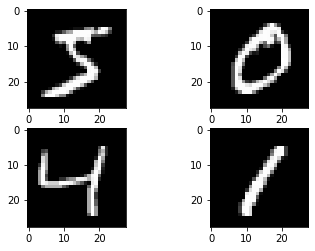

In [42]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

* We create a simple MLP model as a baseline before going on to evaluate CNN models.
* We use 1 hidden layer with same number of neurons as there are inputs (784)
* We use the RELU activation function in the hidden layer, and a softmax activation function on the output layer to turn the outputs into probability-like values, and select 1 out of 10 of the classes as the model's output prediction
* We use logarithmic loss as the loss funcion (categorical_crossentropy in Keras)
* We use the efficient ADAM gradient descent algorithm to learn the weights
* We use 10 epochs, with batch size update of 200 images
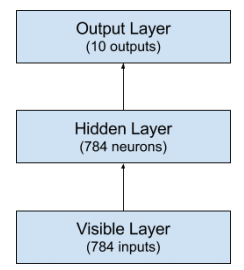

In [40]:
# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 9s - loss: 0.2737 - acc: 0.9226 - val_loss: 0.1400 - val_acc: 0.9591
Epoch 2/10
60000/60000 - 7s - loss: 0.1110 - acc: 0.9679 - val_loss: 0.0908 - val_acc: 0.9727
Epoch 3/10
60000/60000 - 8s - loss: 0.0707 - acc: 0.9796 - val_loss: 0.0808 - val_acc: 0.9753
Epoch 4/10
60000/60000 - 6s - loss: 0.0497 - acc: 0.9858 - val_loss: 0.0717 - val_acc: 0.9778
Epoch 5/10
60000/60000 - 6s - loss: 0.0359 - acc: 0.9896 - val_loss: 0.0644 - val_acc: 0.9797
Epoch 6/10
60000/60000 - 7s - loss: 0.0272 - acc: 0.9927 - val_loss: 0.0635 - val_acc: 0.9797
Epoch 7/10
60000/60000 - 6s - loss: 0.0206 - acc: 0.9944 - val_loss: 0.0590 - val_acc: 0.9816
Epoch 8/10
60000/60000 - 6s - loss: 0.0142 - acc: 0.9968 - val_loss: 0.0605 - val_acc: 0.9812
Epoch 9/10
60000/60000 - 6s - loss: 0.0107 - acc: 0.9977 - val_loss: 0.0623 - val_acc: 0.9820
Epoch 10/10
60000/60000 - 6s - loss: 0.0083 - acc: 0.9984 - val_loss: 0.0597 - val_acc: 0.9821
Baseline 

Creating a simple CNN for MNIST:
* We need to reshape the MNIST data to make it suitable for use in training a CNN
* In Keras, layers used for 2-dimensional convolutions expect pixel values with dimensions: [samples][width][height][channels]
* For now where MNIST data is grayscale, we are forcing channel values/ pixel dimension to be 1 (with RGB, it would be 3)
* We tweak the network architecture to build a CNN
* We evaluate the model as per before, with the CNN being fit over 10 epochs, with batch size of 200

The CNN network architecture that we are building:
1. 1st hidden layer is **convolutional layer called a Conv2D**. Layer has 32 feature maps, with size of 5x5 and a RELU activation function. This is the input layer, expecting images with the above structure.
2. Next we define a **pooling layer** that takes the maximum value called **MaxPooling2D**. It is configured with a pool size of 2x2.
3. Next layer is a **regularization layer** using dropout called **Dropout**. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next layer converts the 2D matrix data to a vector called **Flatten**. It allows the output to be processed by standard fully connected layers. (prepping for the next layer - dense/ hidden layer)
5. Next layer is a **fully connected layer** with 128 neurons and RELU activation function is used
6. Finally, **output layer** has 10 neurons for the 10 classes, and a **softmax activation function** to output probability-like predictions for each class.
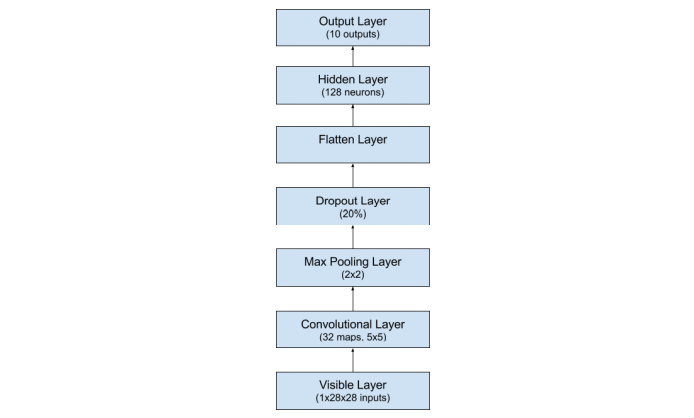

In [43]:
# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s 644us/sample - loss: 0.2350 - acc: 0.9337 - val_loss: 0.0743 - val_acc: 0.9774
Epoch 2/10
60000/60000 [==============================] - 35s 583us/sample - loss: 0.0684 - acc: 0.9792 - val_loss: 0.0469 - val_acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 36s 595us/sample - loss: 0.0505 - acc: 0.9844 - val_loss: 0.0431 - val_acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 36s 606us/sample - loss: 0.0406 - acc: 0.9873 - val_loss: 0.0371 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 36s 595us/sample - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0376 - val_acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 37s 613us/sample - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0336 - val_acc: 0.9885
Epoch 7/10
60000/60000 [==============================] - 36s 596us/sample - loss: 0.0223 - acc: 0.9929 

Now we try creating a larger CNN for MNIST:
* Larger CNN architecture with additional Convolutional, max Pooling layers, and fully connected layers.

Network topology summary:
1. Conv layer with 30 feature maps of size 5x5
2. Pooling layer taking the max over 2x2 patches
3. Conv layer with 15 feature maps of size 3x3
4. Pooling layer taking the max over 2x2 patches
5. Dropout layer with probability of 20%
6. Flatten layer
7. Fully connected layer with 128 neurons and RELU activation function
8. Fully connected layer with 50 neurons and RELU activation function
9. Output Layer

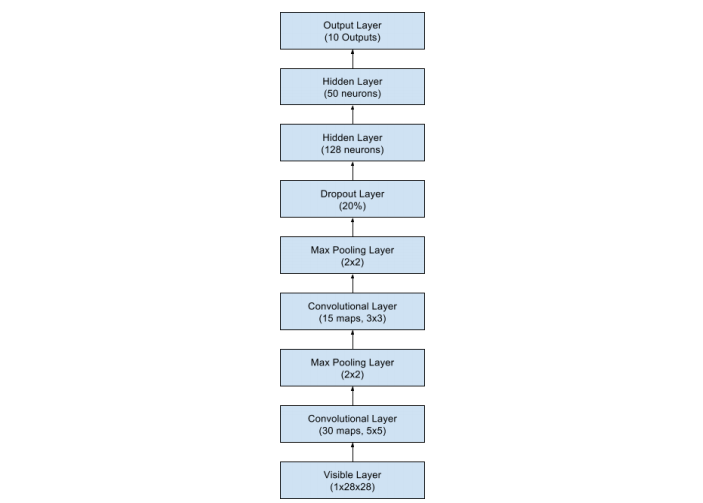

In [44]:
# Import necessary libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 745us/sample - loss: 0.4007 - acc: 0.8737 - val_loss: 0.0771 - val_acc: 0.9768
Epoch 2/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0953 - acc: 0.9704 - val_loss: 0.0494 - val_acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 41s 684us/sample - loss: 0.0705 - acc: 0.9780 - val_loss: 0.0372 - val_acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 43s 721us/sample - loss: 0.0573 - acc: 0.9825 - val_loss: 0.0312 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 40s 671us/sample - loss: 0.0497 - acc: 0.9851 - val_loss: 0.0286 - val_acc: 0.9906
Epoch 6/10
60000/60000 [==============================] - 40s 663us/sample - loss: 0.0431 - acc: 0.9867 - val_loss: 0.0278 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 40s 661us/sample - loss: 0.0397 - acc: 0.9872 

**Improve Model Performance with Image Augmentation**
* Image augmentation API provided by Keras and how to use it with models
* Perform feature standardization
* Perform ZCA whitening of images
* Augment data with random rotations, shifts, and flips of images
* Save augmented image data to disk

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. It includes capabilities as listed above.

* Creating and configuring an agumented image generator:
    - datagen = ImageDataGenerator()
* Fitting the ImageDataGenerator
    - datagen.fit(train)
* Configure the batch size and prepare the data generator and get batches of images by calling flow() function
    - X_batch, y_batch = datagen.flow(train, train, batch_size=32)
* Finally, make use of the data generator by calling the fit_generator() function and pass in the data generator, desired length of an epoch, and total number of epochs on which to train
    - fit_generator(datagen, samples_per_epoch = len(train), epochs=100)

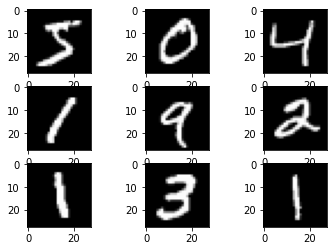

In [46]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
    
# show the plot
pyplot.show()

**Feature Standardization**
* Standardize pixel values across the entire dataset, called feature standardization
* It mirrors the type of standardization often performed for each column in a tabular dataset
* It is different from previous section of sample standardization, as here, pixel values are standardized across all samples (all images in the dataset)
* Each image is considered a feature here
* Set the featurewise_center and featurewise_std_normalization arguments = True on the ImageDataGenerator class

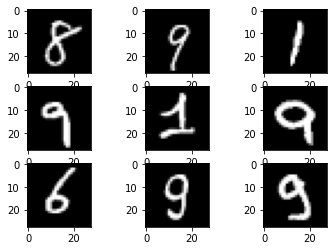

In [56]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

**ZCA Whitening**
* A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images
* Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm
* ZCA is used as a newer and better alternative to the PCA technique. Unlike PCA, ZCA results in transformed images that keeps all of the original dimensinos and transformed images still look like their originals
* Set the zca_whitening argument = True

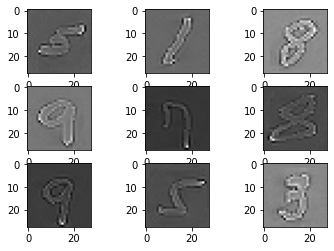

In [48]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

**Random Rotation**
* Images in sample data may have varying and different rotations in the scene
* We can train model to better handle rotations of images by artifically and randomly rotating images from dataset during training
* We set the rotation_range argument = 90 degrees (or whatever degrees we want)

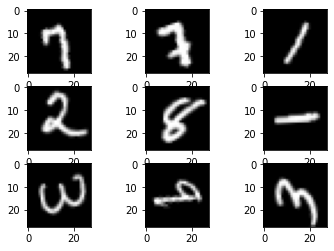

In [49]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

**Random Shifts**
* Objects in images may not be centered in the frame, and may be off-center in a variety of diff ways
* We can artificially create shifted versions of our training data
* Keras supports separate horizontal and vertical random shifting of training data by the width_shift_range and height_shift_range arguments

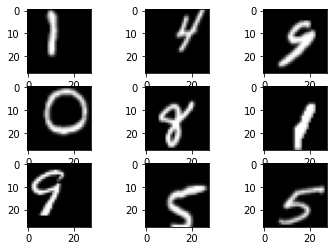

In [50]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

**Random Flips**
* Create random flips of images in training data
* Keras supports random flipping along both vertical and horizontal axes using the vertical_flip and horizontal_flip arguments

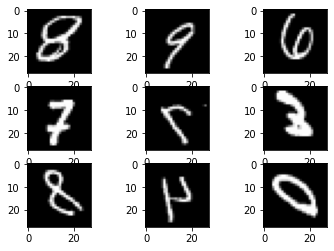

In [55]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

**Save augmented images to file**
* Data prep and augmentation is performed just-in-time by Keras
* It is efficient in terms of memory, but we may require exact images used during training
* We might want to use the exact same images later in a diff software package, or just generate them once and use them on multiple different DL models or configurations of models
* Directory, filename, prefix and image file type can be specified to the flow() function before training
* During training, the generated images will be written to file

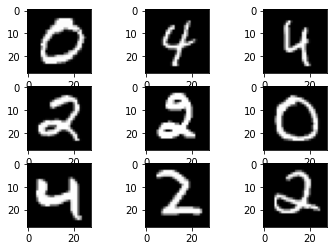

In [57]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
os.makedirs('mnist_aug_images')

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='mnist_aug_images', 
                                     save_prefix='aug_mnist', save_format='png'):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break

**Tips for augmenting image data with Keras**
* **Review Dataset**. Take some time to review your dataset in great detail. Look at the images. Take note of image preparation and augmentations that might benefit the training process of your model, such as the need to handle different shifts, rotations or flips of objects in the scene.
* **Review Augmentations**. Review sample images after the augmentation has been performed. It is one thing to intellectually know what image transforms you are using, it is a very different thing to look at examples. Review images both with individual augmentations you are using as well as the full set of augmentations you plan to use in aggregate. You may see ways to simplify or further enhance your model training process.
* **Evaluate a Suite of Transforms**. Try more than one image data preparation and augmentation scheme. Often you can be surprised by results of a data preparation scheme you did not think would be beneficial.

**Project: Object Recognition in Photographs**
* Learn about the CIFAR-10 object recognition dataset and how to load and use it in Keras
* Create a simple CNN for object recognition
* Lift performance by creating deeper CNNs

* CIFAR-10 dataset consists of 60,000 photos divided into 10 classes
* Classes include common objects such as airplanes, automobiles, birds, cats, and so on
* Dataset is split such that 50,000 images are used for training a model and remaining 10,000 for evaluating its performance
* Photos are in color with red, green and blue channels, but are small, measuring 32x32 pixel squares

170500096/170498071 [==============================] - 17s 0us/step


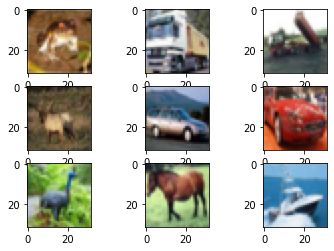

In [58]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
    
# show the plot
pyplot.show()

The CIFAR-10 problem is best solved using a CNN.
* Normalize the data from pixel values in the range of 0 to 255 (for each of the R, G, and B channels) to 0 to 1
* Output variables are currently defined as vector of integers from 0 to 1 for each class, we can use one hot encoding to transform them into a binary matrix in order to best model the classification problem. There are 10 classes for this problem, so we expect the binary matrix to have a width of 10.

**Baseline CNN network structure:**
1. Conv input layer with 32 feature maps with a size of 3x3, a RELU activation function, and a weight constraint of max norm set to 3
2. Dropout set to 20%
3. Conv layer with 32 feature maps with a size of 3x3, a RELU activation function, and a weight constraint of max norm set to 3
4. Max Pool layer with size 2x2
5. Flatten layer
6. Fully connected layer with 512 units and RELU activation function
7. Dropout set to 50%
8. Fully connected output layer with 10 untis and a softmax activation function

A log loss function is used with the SGD optimization algorithm configured with a large momentum and weight decay, starting with a learning rate of 0.01.

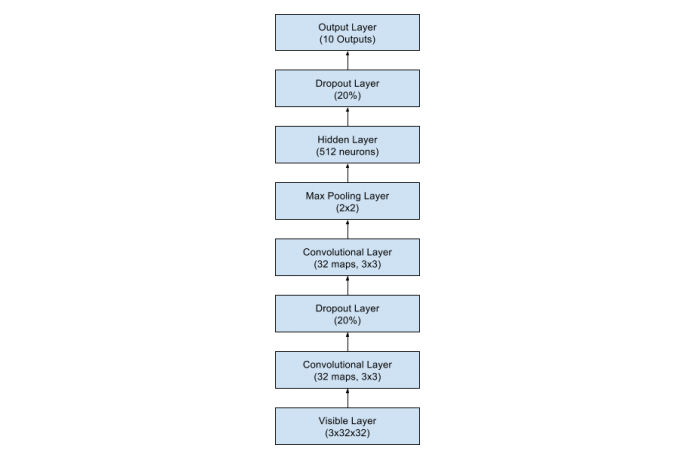

In [59]:
# Import necessary libraries
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_289"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_32 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_820 (Dense)            (None, 512)               4194816   
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)            

**Larger CNN for CIFAR-10**
* A simple CNN performs poorly on this complex problem
* We look at scaling up the size and complexity of our CNN
* We introduce additional round of convolutions with many more feature maps
* We will use the same pattern of Convolution, Dropout, Convolutional and Max Pooling layers
* The pattern will be repeated 3 times with 32, 64, and 128 feature maps
* Effect will be an increasing number of feature maps with smaller and smaller size given the max pooling layers
* Finally, an additional and larger Dense layer will be used as the output end of the network, to attempt to better translate the large number of feature maps to class values

Network structure:

1. Convolutional input layer, 32 feature maps with a size of 3 × 3 and a rectifier activation function.
2. Dropout layer at 20%.
3. Convolutional layer, 32 feature maps with a size of 3 × 3 and a rectifier activation function.
4. Max Pool layer with size 2 × 2.
5. Convolutional layer, 64 feature maps with a size of 3 × 3 and a rectifier activation function.
6. Dropout layer at 20%.
7. Convolutional layer, 64 feature maps with a size of 3 × 3 and a rectifier activation function.
8. Max Pool layer with size 2 × 2.
9. Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
10. Dropout layer at 20%.
11. Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
12. Max Pool layer with size 2 × 2.
13. Flatten layer.
14. Dropout layer at 20%.
15. Fully connected layer with 1,024 units and a rectifier activation function.
16. Dropout layer at 20%.
17. Fully connected layer with 512 units and a rectifier activation function.
18. Dropout layer at 20%.
19. Fully connected output layer with 10 units and a softmax activation function



In [ ]:
# Large CNN model for the CIFAR-10 Dataset
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

**Note:**
* The above deeper CNN was not run due to very long running times.
* The above code is likely to produce better results, and is better to be run on a GPU or online instance

**Extensions/ tips to improve model performance**
* **Train for more epochs.**  Each model was trained for a very small number of epochs, 25. It is common to train large convolutional neural networks for hundreds or thousands of epochs. I would expect that performance gains can be achieved by significantly raising the number of training epochs.
* **Image Data Augmentation.** The objects in the image vary in their position. Another boost in model performance can likely be achieved by using some data augmentation. Methods such as standardization and random shifts and horizontal image flips may be beneficial.
* **Deeper Network Topology.** The larger network presented is deep, but larger networks could be designed for the problem. This may involve more feature maps closer to the input and perhaps less aggressive pooling. Additionally, standard convolutional network topologies that have been shown useful may be adopted and evaluated on the problem.

**Project: Predict Sentiment from Movie Reviews**
* Use the IMDB sentiment analysis problem for NLP and how to load it in Keras
* Use Word Embedding in Keras for NLP
* Develop and evaluate MLP model for the IMDB problem
* Develop a 1-dimensional CNN model for the IMDB problem

* The IMDB dataset contains 50,000 highly-polar movie reviews (either good, or bad)
* 50,000 for training, 50,000 for testing
* Problem is to determine whether a given movie review has a positive or negative sentiment
* Keras provides access to the IMDB dataset built-in
* We can use the imdb.load_data() function to load the dataset in a format that is ready for use in NN and DL models
* Words have been replaced by integers that indicate the absolute popularity of the word in the dataset
* Here, the sentences in each review are therefore comprised of a sequence of integers

In [ ]:
# We explore the dataset

# Load and Plot the IMDB dataset
import numpy
from keras.datasets import imdb
from matplotlib import pyplot

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

**Word Embeddings**
* Technique in NLP, where words are encoded as real-valued vectors in a high-dimensional space, where the similarity between words in terms of meaning translates to closeness in the vector space.
* Discrete words are mapped to vectors of continuous numbers
* This is useful when working with NLP problemns with NN as we require numbers as input values
* Keras provides a convenient way to convert positive integer representations of words into a word embedding by an Embedding layer
* The layer takes arguments that define the mapping including the max number of expected words also called the vocabulary size
* The layer also allows us to specify the dimensionality for each word vector, called the output dimension

* We will use a word embedding representation for the IMDB dataset
* We use the 1st 5,000 most used words in the dataset
* This means our vocabulary size will be 5,000
* We can choose to use a 32-dimensional vector to represent each word
* We can also choose to cap the maximum review length at 500 words, truncating reviews longer than that, and padding shorter reviews with 0 values

We will start by developing a simple MLP model with a single hidden layer

In [ ]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

* We will create a CNN to use on this 1-dimensional sequence of words in the movie reviews
* Keras supports 1-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively
* This time after the Embedding input layer, we insert a Conv1D layer
* This convolutional layer has 32 feature maps and reads embedded word representations 3 vector elements of the word embedding at a time
* The convolutional layer is followed by a MaxPooling1D layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer
* We can see that the convolutional layer preserves the dimensionality of our Embedding input layer of 32 dimensionaly input with a maximum of 500 words
* The pooling layer compresses this representation by halving it

In [ ]:
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

* There are more opportunities for further optimization, such as the use of deeper and/ or larger convolutional layers